In [28]:
## Importing all the neccessary liabraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

In [29]:
## Loading the train dataset
train=pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [30]:
## Dropping the column 'ID'
train.drop('Id',axis=1, inplace=True)

In [31]:
## Checking the dimensions of data
print('Number of Columns/Features: ',train.shape[1])
print('Number of Rows/Observations: ',train.shape[0])

Number of Columns/Features:  80
Number of Rows/Observations:  1168


## Column Description:

MSSubClass: Identifies the type of dwelling involved in the sale.	

   

MSZoning: Identifies the general zoning classification of the sale.
	
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property


       	
Alley: Type of alley access to property


		
LotShape: General shape of property


       
LandContour: Flatness of the property


		
Utilities: Type of utilities available
		
	
	
LotConfig: Lot configuration

  
	
LandSlope: Slope of property
		

	
Neighborhood: Physical locations within Ames city limits


			
Condition1: Proximity to various conditions
	
 
	
Condition2: Proximity to various conditions (if more than one is present)

	
BldgType: Type of dwelling
		
     
	
HouseStyle: Style of dwelling
	

	
OverallQual: Rates the overall material and finish of the house


	
OverallCond: Rates the overall condition of the house

		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

		
RoofMatl: Roof material

		
Exterior1st: Exterior covering on house

	
Exterior2nd: Exterior covering on house (if more than one material)

	
MasVnrType: Masonry veneer type

	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 

		
ExterCond: Evaluates the present condition of the material on the exterior
		
		
Foundation: Type of foundation

		
BsmtQual: Evaluates the height of the basement

		
BsmtCond: Evaluates the general condition of the basement

	
BsmtExposure: Refers to walkout or garden level walls

	
BsmtFinType1: Rating of basement finished area

		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)


BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
HeatingQC: Heating quality and condition

		
CentralAir: Central air conditioning

		
Electrical: Electrical system
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

		
GarageType: Garage location
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality
		
GarageCond: Garage condition

		
PavedDrive: Paved driveway

		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
		
Fence: Fence quality

	
MiscFeature: Miscellaneous feature not covered in other categories

		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
SaleCondition: Condition of sale

In [33]:
## Checking for columns with numeric datatype
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(train.select_dtypes(include=['int64','float64','int32']).columns)

print(colored('Num of columns with object data: ',attrs=['bold','underline'],color='green'))
print(len(train.select_dtypes(include=['int64','float64','int32']).columns))

columns with object data: 
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Num of columns with object data: 
37


In [34]:
## Checking for columns with object datatype
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(train.select_dtypes(include=['object']).columns)

print(colored('Num of columns with object data: ',attrs=['bold','underline'],color='green'))
print(len(train.select_dtypes(include=['object']).columns))

columns with object data: 
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Num of columns with object data: 
43


- Dataset has 79 features/independent variables and 1168 observations.
- 36 features have numeric type data.
- 43 features have object tupe data.
- 'SalePrice' is the label/target variable and stores numeric data. 

In [35]:
## Checking for null values in the dataset
train.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

**Following features have missing values:**
- LotFrontage       214
- Alley            1091
- MasVnrType          7
- MasVnrArea          7
- BsmtQual           30
- BsmtCond           30
- BsmtExposure       31
- BsmtFinType1       30
- BsmtFinType2       31
- FireplaceQu       551
- GarageType         64
- GarageYrBlt        64
- GarageFinish       64
- GarageQual         64
- GarageCond         64
- PoolQC           1161
- Fence             931
- MiscFeature      1124

<font color='red'>
             
### Missing value handling

**We will drop 'Alley', 'PoolQC', 'Fence', 'MiscFeature' as they are missing too much of the data and hence would be of no use in our prediction task.**

In [36]:
train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)
train.shape

(1168, 76)

- Successfully dropped above mentioned features.
- Now we have 75 features and a target.

**Replacing missing values in 'LotFrontage' and 'MasVnrArea' by the means of respective columns.**

In [37]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)

**Replacing the missing values in the following columns by the modes of those respective columns:<br>
'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'**

In [38]:
a=['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for i in a:
    train[i].fillna(train[i].mode()[0],inplace=True)

**Replacing missing values in  'FireplaceQu' using interpolation function**

In [39]:
train['FireplaceQu']=train['FireplaceQu'].interpolate(method='ffill')

In [40]:
train.isna().sum().sum()

0

- We have successfully imputed all the missing values

<font color='red'>

### Storing catagorical and continuous features in a seperate dataframes for ease of analysis

In [41]:
cont_feat=train[['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','LowQualFinSF']]

In [42]:
cat_feat=train.drop(['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','LowQualFinSF','SalePrice'],axis=1)

In [43]:
## Printing categorical features
cat_feat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [44]:
## Printing continuous features
cont_feat.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'LowQualFinSF'],
      dtype='object')

In [45]:
print('cont_feat dimensions: ', cont_feat.shape)
print('cat_feat dimensions: ', cat_feat.shape)

cont_feat dimensions:  (1168, 22)
cat_feat dimensions:  (1168, 53)


<font color='red'>

# Exploratory Data Analysis

<font color='blue'>

### Plotting the continous variables against the target variable

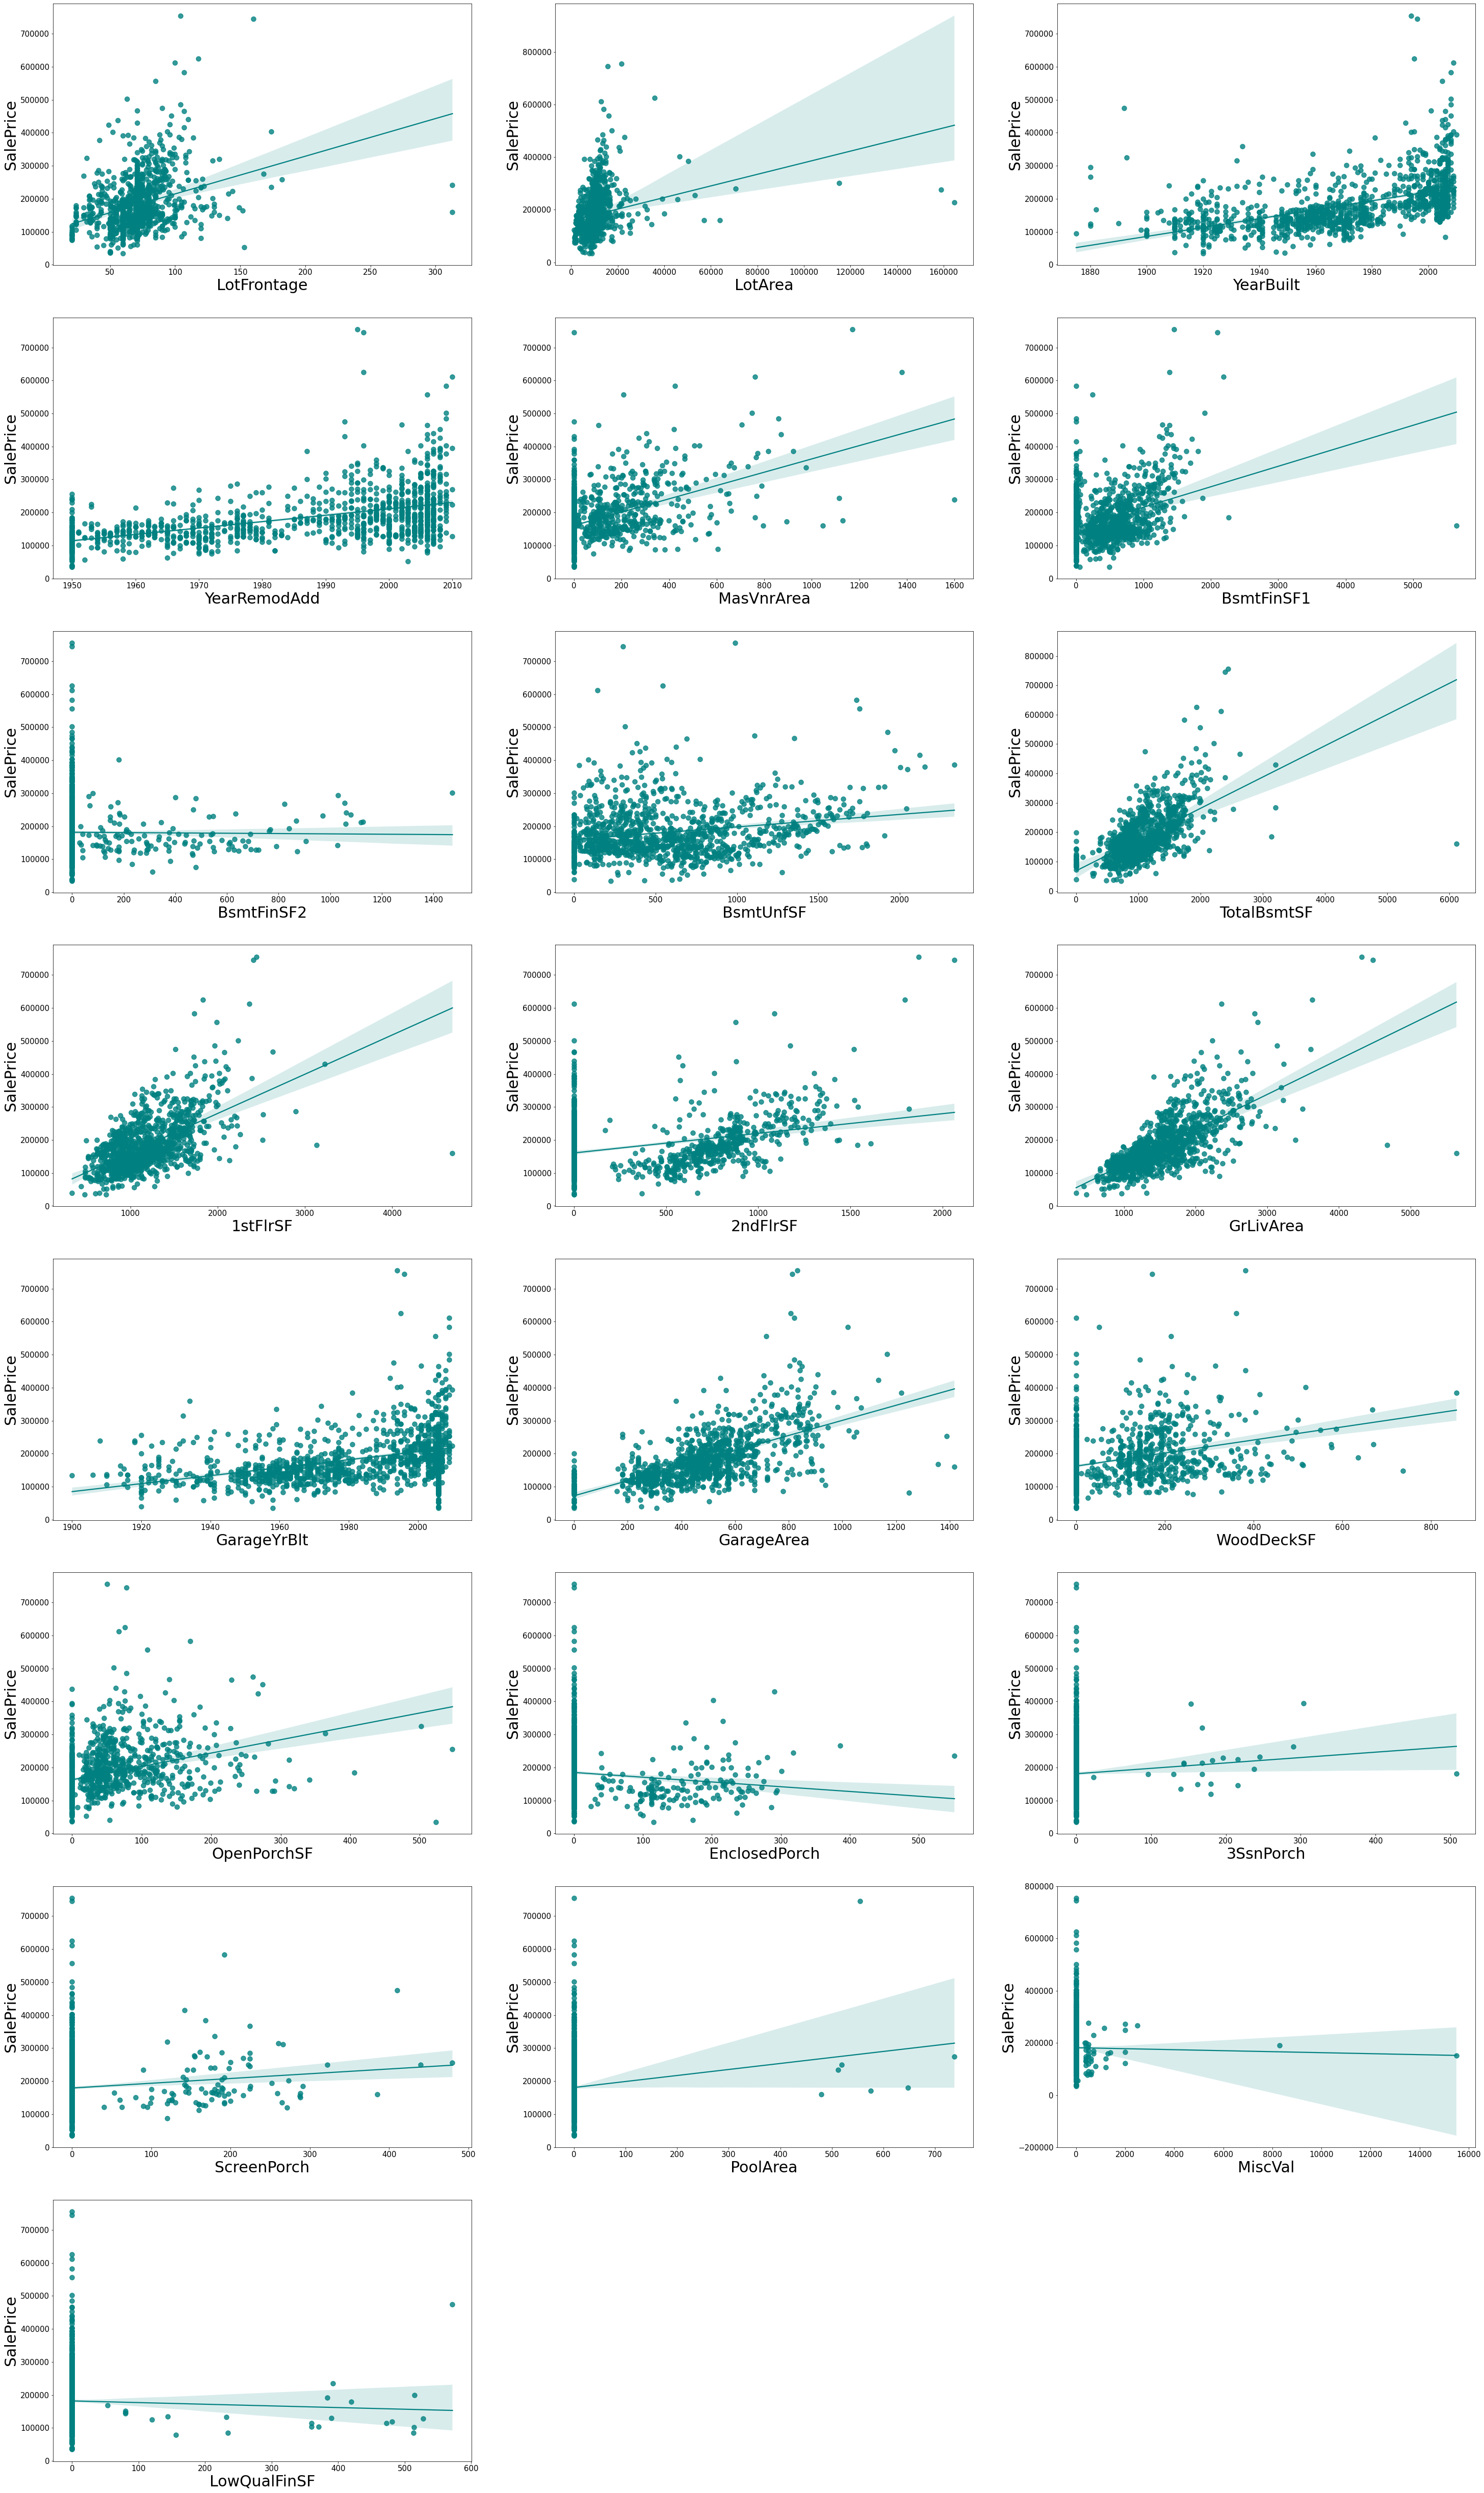

In [46]:
plt.figure(figsize=(50,100))

parameters = {'ytick.labelsize': 15,
                  'xtick.labelsize': 15,'font.size': 30.0}
plt.rcParams.update(parameters)


plot_number=1

for i in cont_feat:
    if plot_number<25:
        ax=plt.subplot(9,3,plot_number)
        sns.regplot(cont_feat[i],train['SalePrice'],color='teal',scatter_kws={'s':90})
        plt.xlabel(i)
    plot_number+=1

1. Features
 - 'GarageArea', 
 - 'GrLivArea', 
 - '1stFlrSF', 
 - 'TotalBsmtSF', 
 - '2ndFlrSF', 
 - 'MasVnrArea', 
 - 'LotFrontage', 
 - 'BsmtFinSF1' show good linear relationship with the target variable 'SalePrice'.
 
 
2. Features
 - 'LowQualFinSF', 
 - 'MiscVal', 
 - 'PoolArea', 
 - 'ScreenPorch', 
 - '3SsnPorch', 
 - 'EnclosedPorch', 
 - 'BsmtFinSF2' have very few non-zero values which means that very few houses have these features.<br> 
 These features also show very little to no relationship with the target variable 'SalePrice'. <br>
 We may drop these features during the feature selection step.
 
 
3. Features 
 - 'OpenPorchSF', 
 - 'WoodDeckSF', 
 - 'GarageYrBlt', 
 - 'LotArea', 
 - 'YearRemodAdd', 
 - 'YearBuilt', 
 - 'MasVnrArea' show moderate linear relationship with the target variable 'SalePrice'.


<font color='blue'>

### Plotting the catagorical variables against the target variable using boxplot

In [47]:
plt.figure(figsize=(40,450))

plot_number=1
parameters = {'ytick.labelsize': 15,
                  'xtick.labelsize': 25,'font.size': 30.0}
plt.rcParams.update(parameters)

for i in cat_feat:
    if plot_number<60:
        ax=plt.subplot(30,2,plot_number)
        sns.boxplot(cat_feat[i],train['SalePrice'])
        plt.xticks(rotation=90)
        plt.xlabel(i)
    plot_number+=1


1. Average SalePrices of houses with 'MSSubclass'es 60 and 120 are higher compared to others.


2. Houses with 'RL' and 'RH' MSZoning have higher average SalePrice compared to others.


3. Houses with paved ('Pave') road ('Street') access have higher SalePrice than the houses with gravel ('Grvl') road access.


4. Houses with 'Regular' Lotshape have slightly lower average SalePrices than the houses with irregular Lotshapes.


5.  Houses with 'LandContour' ( Flatness of the property) catagories 'HLS' (Hillside - Significant slope from side to side) and 'Low' (Depression) have higher average SalePrices than the houses with catagories 'Lvl' (Near Flat/Level) and 'Bnk' (Banked - Quick and significant rise from street grade to building).<br> However 'Lvl' catagory shows few houses with very high SalePrices. 


6. All the houses have 'AllPub' i.e. All public Utilities (E,G,W,& S).


7. Houses with Lot Configurations 'CulDSac' (Cul-de-sac) & 'FR3' (Frontage on 3 sides of property) have higher SalePrices than the houses with 'Inside' (Inside lot), 'Corner' (Corner lot) and 'FR2' (Frontage on 2 sides of property) configurations.<br>
However, 'Inside' catagory have few houses with uncharactistically high SalePrices.


8. 'LandSlope' (Slope of property) seem to have no effect on the average SalePrice of the house. However, few of the houses with 'Gtl' (Gentle slope) have higher than normal SalePrices.


9. Houses in neighborhoods, 'StoneBr' (Stone Brook), 'NridgHt' (Northridge Heights), 'NoRidge' (Northridge) have higher average SalePrices than the other neighborhoods.


10.  Houses with 'Condition1' (Proximity to various conditions) catagories 'RRNn' (Within 200' of North-South Railroad), 'PosN' (Near positive off-site feature--park, greenbelt, etc.), 'PosA' (Adjacent to postive off-site feature) have higher average SalePrices compared to others.


11. Houses with 'Condition2' (Proximity to various conditions (if more than one is present)) catagories 'PosN' (Near positive off-site feature--park, greenbelt, etc.) & 'PosA' (Adjacent to postive off-site feature) have higher average SalePrices compared to others.


12. 'BldgType' (Type of dwelling) seem to have very slight effect on the SalePrices on the houses. Houses with '1Fam' (Single-family Detached) & 'TwnhsE' (Townhouse End Unit) dwelling types have slightly higher average SalePrice than others. However, few houses with '1Fam' dwelling type have very high SalePrices.


13. '2Story' (Two story) & '2.5Fin'	(Two and one-half story: 2nd level finished) houses have higher average SalePrices compared to others. Houses with unfinished dwelling styles have low average SalePrices.


14. Average SalePrice of the houses increases with higher Overall material and finish Quality rating.


15. Houses with less than 4 overall condition rating have lower average SalePrices.


16. Houses with 'Flat' and 'Shed' roof types have higher average SalePrices.


17. Houses with 'WdShngl' (Wood Shingles) roof material have higher average SalePrices.


18. Houses with 'Exterior1st' (Exterior covering on house) of Stone and Cement Board ('CementBd') tend to sell at higher prices.


19. Houses with 'Exterior2nd' (Exterior covering on house (if more than one material)) of Imitation Stucco (ImStucc) and Cement Board ('CementBd') tend to sell at higher prices. 


20. Houses with Stone 'MasVnrType' (Masonry veneer type) tend to sell at higher prices.


21. Houses with Excellent 'ExterQual' (quality of the material on the exterior) have the highest average SalePrices and with fair 'Fa' quality have lowest average SalePrices.


22. Houses with Excellent 'ExterCond' (present condition of the material on the exterior) have the highest average SalePrices and the ones with fair ('Fa') or poor 'Po' conditions have lowest average SalePrices.


23. Houses with 'PConc' (Poured Concrete) type of foundation tend to sell at higher prices.


24. Houses with 'Ex' (Excellent (100+ inches)) 'BsmtQual' (Evaluates the height of the basement) have higher average SalePrices.


25. Houses with good (Gd) and typical (TA) 'BsmtCond' have higher average SalePrices.


26. Houses with	No Exposure ('No') exposure to walkout or garden level walls ('BsmtExposure') tend to sell at lower average prices.


27. Houses with 'BsmtFinType1' (Rating of basement finished area) of 'GLQ' (Good Living Quarters) have higher average SalePrices than others.


28. Houses with 'BsmtFinType2' (Rating of basement finished area (if multiple types)) of 'GLQ' (Good Living Quarters) have higher average SalePrices than others.


29. Houses having 'GasA' (Gas forced warm air furnace) and 'GasW' (Gas hot water or steam heat) type heating have higher average SalePrices than others.


30. Houses with Excellent 'HeatingQC' (Heating quality and condition) have higher average SalePrices than others.


31. Houses with Central air conditioning have higher average SalePrices than others.


32. Houses with 'SBrkr' (Standard Circuit Breakers & Romex) Electrical system have higher average SalePrices than others.


33. Houses with no BsmtFullBath (Basement full bathrooms) tend to have lower average SalePrices.


34. 'BsmtHalfBath' (Basement half bathrooms) seem to have no effect on SalePrice of the house.


35. Houses with 3 'FullBath' (Full bathrooms above grade) tend to have higher average SalePrices.


36. Houses with 1 'HalfBath' (Half baths above grade) tend to have slightly higher average SalePrices.


37. Houses with 0 'BedroomAbvGr' (Bedrooms above grade) tend to have higher average SalePrices.


38. Houses with 1 'Kitchen' (Kitchens above grade) tend to have higher average SalePrices.


39. Houses with Escellent Kitchen quality have higher average SalePrices followed by the houses with good and typical kitchen quality.


40. Average SalePrice of the house tend to increase with increase in number of 'TotRmsAbvGrd' (Total rooms above grade).


41. Home functionality () seem to have little to no effect on House's SalePrice.


42. Presence of Fire Place increases the average SalePrice of the houses.


43. Houses with Excellent fireplace quality tend to have higher average SalePrices.


44. Houses with built-in or attached garages tend to have higher average SalePrices.


45. Houses with unfinished garage interiors  tend to have lower average SalePrices.


46. SalePrice of the house increases with the size of garage. However, extra large garage decreases the average SalePrice of the house.


47. Houses with Excellent and Good Quality garages have higher SalePrices than others.


48. Garage Condition seem to have little to no effect on the average SalePrice of the House.


49. Houses with fully paved driveway tend to have slightly higher average SalePrice.


50. 'MoSold' seem to have little to no effect on the average SalePrice of the houses.


51. 'YrSold' (Year Sold) seem to have little to no effect on the average SalePrice of the houses.


52. Houses with the SaleType of 'New' (Home just constructed and sold) and 'Con' (Contract 15% Down payment regular terms) have higher average SalePrice than others.


53. Houses With SaleCondition of 'Partial' (Home was not completed when last assessed) have higher average SalePrice than others.


<font color='red'>

### Checking for the outliers in continuous variables using boxplots

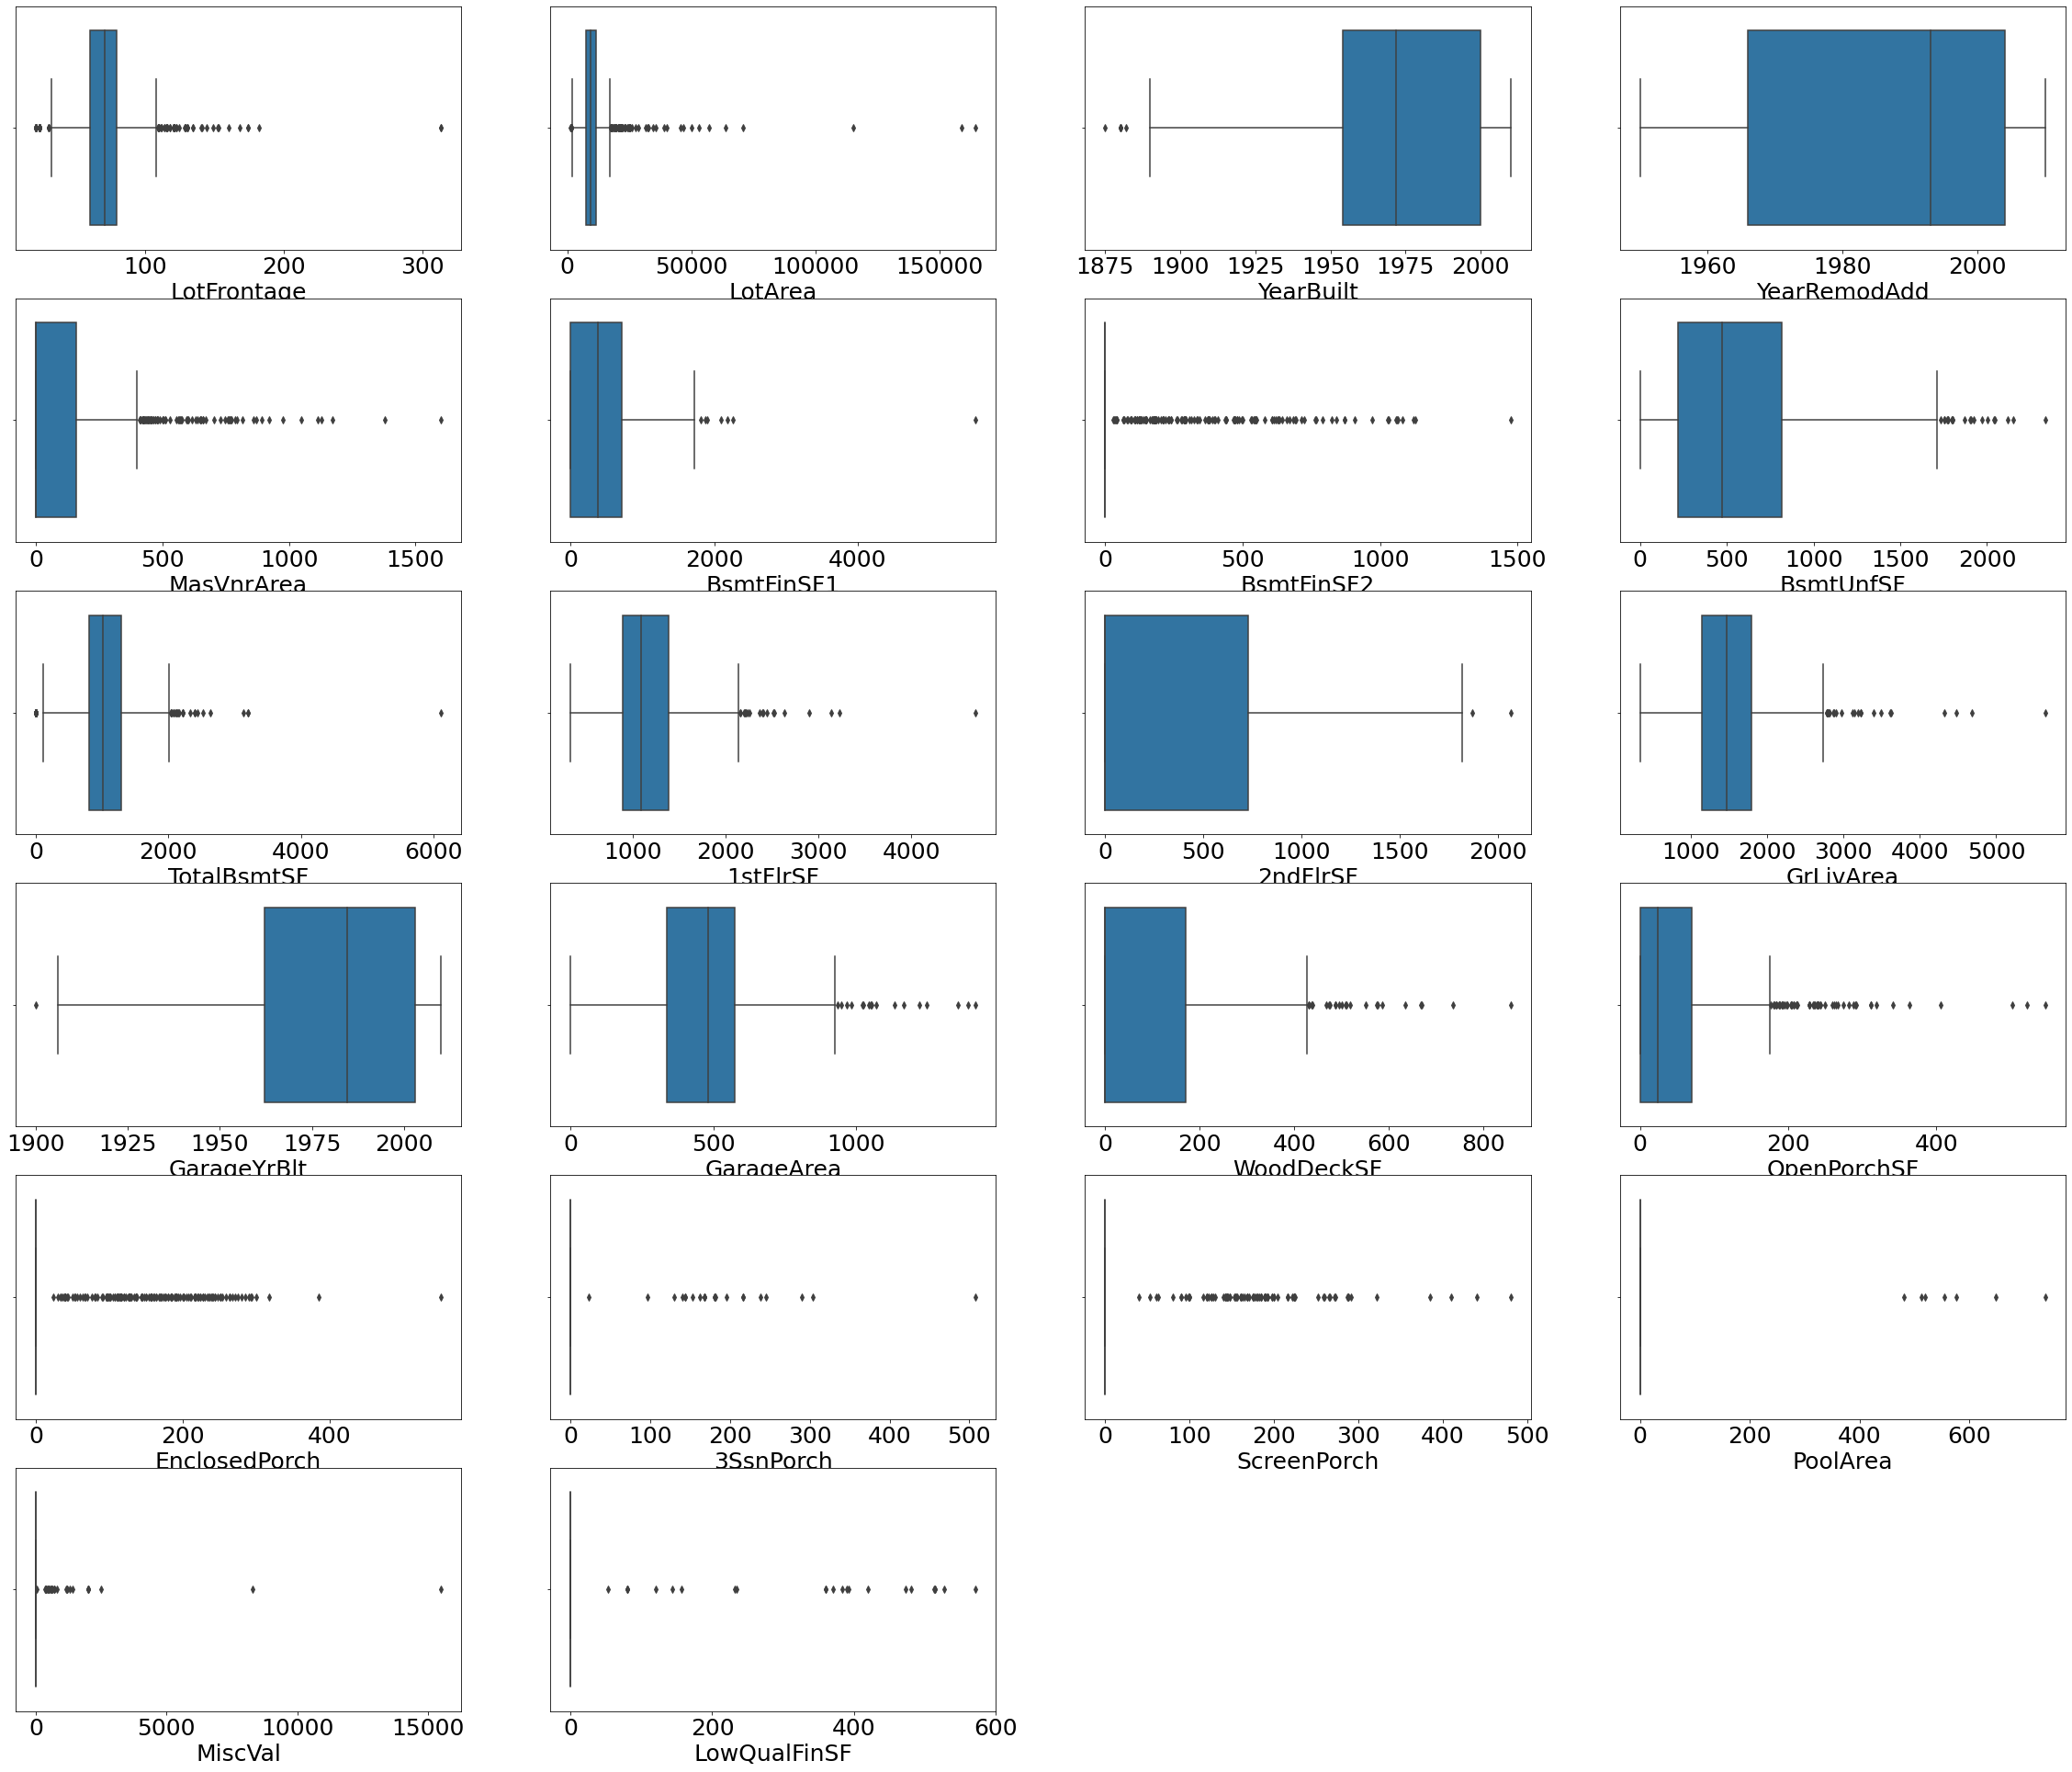

In [48]:
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<25:
        ax=plt.subplot(7,4,plot_number)
        sns.boxplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

- All the continuous features, except the 'YearRemodAdd' have outliers.
- However, removing outliers will not be agood idea in this case as:
 - The outliers here have the values which are verymuch possible in real world.
 - Also, we have 53 catagorical variables in this dataset and removal of observations containing outliers in the continous features may cause loss of few classes in the catagorical variables which is not desirable.
 
- **Hence we will not use Linear Regression model for this dataset as it requires the features to be free of outliers and skewness.**

<font color='red'>

### Encoding the object type features using LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in train.columns:
    if train[i].dtypes=='O':
        train[i]=le.fit_transform(train[i])


In [50]:
print(colored('Num of columns with object data: ',attrs=['bold','underline'],color='green'))
print(len(train.select_dtypes(include=['object']).columns))

Num of columns with object data: 
0


- Successfully encoded all the object type data

<font color='red'>
    
### Feature Selection using SelectKBest method and ANOVA F-values

In [51]:
## Importing SelectKBest and f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [56]:
## We will select top 45 features for our further analysis.
## 45 features + 1 Target hence k=46
selectbest=SelectKBest(score_func=f_regression,k=46)
selectbest.fit(train,train['SalePrice'])

SelectKBest(k=46, score_func=<function f_regression at 0x0000028987871D30>)

In [57]:
## Saving the scores and the feature names in dataframes
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(train.columns)

In [58]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores=feature_scores.nlargest(46,'Scores')
feature_scores

Features       Scores
75      SalePrice          inf
15    OverallQual  1925.310146
44      GrLivArea  1167.278131
59     GarageCars   760.625799
28       BsmtQual   754.737009
25      ExterQual   746.729944
60     GarageArea   724.282299
36    TotalBsmtSF   639.162482
51    KitchenQual   630.659595
41       1stFlrSF   615.032166
47       FullBath   518.998338
58   GarageFinish   472.788235
52   TotRmsAbvGrd   451.573798
17      YearBuilt   419.564317
18   YearRemodAdd   405.199690
24     MasVnrArea   319.254378
54     Fireplaces   312.273172
38      HeatingQC   230.953343
57    GarageYrBlt   199.214439
27     Foundation   189.817339
32     BsmtFinSF1   176.819524
65    OpenPorchSF   151.901231
42       2ndFlrSF   142.869824
2     LotFrontage   136.550260
64     WoodDeckSF   128.843420
56     GarageType   114.871599
48       HalfBath   111.632993
30   BsmtExposure    90.633453
3         LotArea    77.401137
5        LotShape    76.525762
39     CentralAir    75.597514
40     Electrical    67.924069
63     PavedDrive    66.152095
74  SaleCondition    58.002352
35      BsmtUnfSF    56.910469
45   BsmtFullBath    55.372874
14     HouseStyle    51.412890
10   Neighborhood    48.049600
19      RoofStyle    44.944903
20       RoofMatl    30.580617
49   BedroomAbvGr    29.962224
62     GarageCond    21.668056
1        MSZoning    21.067891
50   KitchenAbvGr    20.710982
53     Functional    16.655755
26      ExterCond    15.672940

In [59]:
## Creating the dataframe with top 45 features and the target
train1=train[feature_scores['Features'].values[:46]]
train1.shape

(1168, 46)

In [60]:
## Printing the column names
train1.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'BsmtQual',
       'ExterQual', 'GarageArea', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'HeatingQC', 'GarageYrBlt', 'Foundation',
       'BsmtFinSF1', 'OpenPorchSF', '2ndFlrSF', 'LotFrontage', 'WoodDeckSF',
       'GarageType', 'HalfBath', 'BsmtExposure', 'LotArea', 'LotShape',
       'CentralAir', 'Electrical', 'PavedDrive', 'SaleCondition', 'BsmtUnfSF',
       'BsmtFullBath', 'HouseStyle', 'Neighborhood', 'RoofStyle', 'RoofMatl',
       'BedroomAbvGr', 'GarageCond', 'MSZoning', 'KitchenAbvGr', 'Functional',
       'ExterCond'],
      dtype='object')

**Seperating the features and the label**

In [61]:
X=train1.drop('SalePrice',axis=1)
y=train1['SalePrice']

**Scaling the features using StandardScaler**

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#### Seperating the data in training and testing sets in 75:25 proportion

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

**Importing regression performance metrics**

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

## Model 1: KNeighborsRegressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [66]:
## Using Grid Search CV to select best K value

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,14,13,15,16,17,18,19,20]}

model = GridSearchCV(knr, params, cv=5)

model.fit(X_train,y_train)

model.best_params_

{'n_neighbors': 6}

In [67]:
knr=KNeighborsRegressor(n_neighbors=6)

In [68]:
## Training the model
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [69]:
## Predicting the output for test set
y_knr=knr.predict(X_test)

In [70]:
## R2 score for knr model
knr_score=r2_score(y_test,y_knr)
knr_score

0.7364257027027719

In [71]:
## Cross Validation score for knr model
knr_cvs=cross_val_score(knr,X_scaled,y,cv=7).mean()
knr_cvs

0.7564137667939818

In [72]:
## Root mean squred error for knr model
knr_rmse=np.sqrt(mean_squared_error(y_test,y_knr))
knr_rmse

42838.913443132566

In [73]:
## Root mean absolute error for knr model
knr_rmae=np.sqrt(mean_absolute_error(y_test,y_knr))
knr_rmae

153.70905179181779

## Model 2: Decision Tree regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [75]:
## Training the model
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [76]:
## Predicting the output for test set
y_dtr=dtr.predict(X_test)

In [77]:
## R2 score for dtr model
dtr_score=r2_score(y_test,y_dtr)
dtr_score

0.6443224590894522

In [82]:
## Cross Validation score for dtr model
dtr_cvs=cross_val_score(dtr,X_scaled,y,cv=7).mean()
dtr_cvs

0.6888298811071325

In [83]:
## Root mean squred error for dtr model
dtr_rmse=np.sqrt(mean_squared_error(y_test,y_dtr))
dtr_rmse

49763.98375558399

In [84]:
## Root mean absolute error for dtr model
dtr_rmae=np.sqrt(mean_absolute_error(y_test,y_dtr))
dtr_rmae

170.8102167230822

## Model 3: RandomForest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [86]:
## Training the model
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [87]:
## Predicting the output for test set
y_rfr=rfr.predict(X_test)

In [88]:
## r2 score for rfr model
rfr_score=r2_score(y_test,y_rfr)
rfr_score

0.8140343945917647

In [92]:
## Cross validation score for the rfr model
rfr_cvs=cross_val_score(rfr,X_scaled,y,cv=7).mean()
rfr_cvs

0.8355197041268119

In [93]:
## Root mean squred error for knr model
rfr_rmse=np.sqrt(mean_squared_error(y_test,y_rfr))
rfr_rmse

35983.48582548182

In [94]:
## Root mean absolute error for knr model
rfr_rmae=np.sqrt(mean_absolute_error(y_test,y_rfr))
rfr_rmae

141.18978301834423

## Model 4: GradientBoostingRegressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [96]:
## Training the model
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [97]:
## Predicting the output for test set
y_gbr=gbr.predict(X_test)

In [98]:
## r2 score for gbr model
gbr_score=r2_score(y_test,y_gbr)
gbr_score

0.8304328786858949

In [99]:
## Cross validation score for the gbr model
gbr_cvs=cross_val_score(gbr,X_scaled,y,cv=7).mean()
gbr_cvs

0.8480622801450023

In [100]:
## Root mean squred error for gbr model
gbr_rmse=np.sqrt(mean_squared_error(y_test,y_gbr))
gbr_rmse

34360.36289470664

In [101]:
## Root mean absolute error for gbr model
gbr_rmae=np.sqrt(mean_absolute_error(y_test,y_gbr))
gbr_rmae

135.69065357640517

## Model 5: AdaBoostRegressor

In [102]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [103]:
## Training the model
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [104]:
## Predicting the output for test set
y_abr=abr.predict(X_test)

In [105]:
## r2 score for abr model
abr_score=r2_score(y_test,y_abr)
abr_score

0.7703302357968008

In [106]:
## Cross validation score for the abr model
abr_cvs=cross_val_score(abr,X_scaled,y,cv=7).mean()
abr_cvs

0.7849395356083007

In [107]:
## Root mean squred error for abr model

abr_rmse=np.sqrt(mean_squared_error(y_test,y_abr))
abr_rmse

39988.84223542414

In [108]:
## Root mean absolute error for abr model
abr_rmae=np.sqrt(mean_absolute_error(y_test,y_abr))
abr_rmae

161.81142863192042

**Saving performance metrics of all models in single dataframe**

In [109]:
metrics=pd.DataFrame()
metrics['Model']=['KNN Regressor','Decision Tree Regressor','RandomForest Regressor','GradientBoosting Regressor','AdaBoost regressor']
metrics['R2 Score']=[knr_score,dtr_score,rfr_score,gbr_score,abr_score]
metrics['Cross Val Score']=[knr_cvs,dtr_cvs,rfr_cvs,gbr_cvs,abr_cvs]
metrics['RMSE']=[knr_rmse,dtr_rmse,rfr_rmse,gbr_rmse,abr_rmse]
metrics['RMAE']=[knr_rmae,dtr_rmae,rfr_rmae,gbr_rmae,abr_rmae]

metrics.nlargest(5,'Cross Val Score')

Model  R2 Score  Cross Val Score          RMSE  \
3  GradientBoosting Regressor  0.830433         0.848062  34360.362895   
2      RandomForest Regressor  0.814034         0.835520  35983.485825   
4          AdaBoost regressor  0.770330         0.784940  39988.842235   
0               KNN Regressor  0.736426         0.756414  42838.913443   
1     Decision Tree Regressor  0.644322         0.688830  49763.983756   

         RMAE  
3  135.690654  
2  141.189783  
4  161.811429  
0  153.709052  
1  170.810217

<font color='blue'>


#### Based on the Cross Validation Score, RMSE and RMAE, Gradient Boosting Regressor is our best model for this problem.

<font color='red'>
    
### Tuning the Hyperparameters of our best performing model

In [110]:
## importing the GridSearchCV
from sklearn.model_selection import GridSearchCV

In [111]:
## Parameter grid
gbr_grid={'loss':['ls', 'lad'],'n_estimators':[80,100,150],
          'learning_rate':[0.01,0.05,0.1,0.2, 0.3],'criterion':['friedman_mse','mse'],
          'min_samples_split':[2,4],'min_samples_leaf':[1,2,3]
         }

In [94]:
gridCV=GridSearchCV(gbr,param_grid=gbr_grid,n_jobs=-1)

In [95]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'loss': ['ls', 'lad'], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [80, 100, 150]})

In [96]:
## Printing te best parameters
gridCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.2,
 'loss': 'ls',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 80}

In [97]:
## Instantiating the gbr model with best parameters
gbr_best=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1,loss='ls',n_estimators=150)

In [98]:
## Training the best model
gbr_best.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=150)

In [99]:
## Predicting the output for test data using best model 
y_best=gbr_best.predict(X_test)

In [100]:
## r2 score for best model
best_score=r2_score(y_test,y_best)
best_score

0.831844823329612

In [101]:
## Cross validation score for best model
best_cvs=cross_val_score(gbr_best,X_scaled,y,cv=7).mean()
best_cvs

0.8459019407288413

In [102]:
## Root mean squared error for best model
best_rmse=np.sqrt(mean_squared_error(y_test,y_best))
best_rmse

34217.008612102465

In [103]:
## Root mean absolute error for best model
best_rmae=np.sqrt(mean_absolute_error(y_test,y_best))
best_rmae

134.8400026159785

**Plotting the actual vs predicted output**

Text(0.5, 1.0, 'Actual vs Predicted Price')

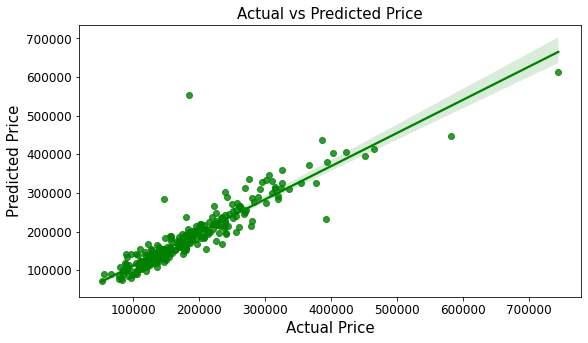

In [104]:
plt.figure(figsize=(9,5))
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



sns.regplot(y_test,y_best,color='green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

<font color='red'>
    
### Saving the hyperparameter tuned best performing model

In [105]:
## Saving the best model
import pickle
filename='HousePrice_gbr.pkl'
pickle.dump(gbr_best,open(filename,'wb'))

## Predicting the output for test set

In [170]:
test=pd.read_csv('test.csv')
test1=pd.read_csv('test.csv') ##saving the copy of test dataset
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

## Applying all the preprocessing steps to test set

In [171]:
## Dropping the column 'ID'
test.drop('Id',axis=1, inplace=True)

In [172]:
## Dropping 'Alley', 'PoolQC', 'Fence', 'MiscFeature'
test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)
test.shape

(292, 75)

### Imputing the missing values

In [173]:
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(),inplace=True)

In [174]:
a=['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','Electrical','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for i in a:
    test[i].fillna(test[i].mode()[0],inplace=True)

In [175]:
test['FireplaceQu']=test['FireplaceQu'].interpolate(method='ffill')

In [176]:
test.isnull().sum().sum()

0

- Successfully imputed all te missing values

**Encoding the object data in numeric form**

In [177]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in test.columns:
    if test[i].dtypes=='O':
        test[i]=le.fit_transform(test[i])


In [178]:
print(colored('Num of columns with object data: ',attrs=['bold','underline'],color='green'))
print(len(test.select_dtypes(include=['object']).columns))

Num of columns with object data: 
0


In [179]:
## Retaining only top 45 features
test=test[['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtQual',
       'ExterQual', 'GarageArea', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'HeatingQC', 'GarageYrBlt', 'Foundation',
       'BsmtFinSF1', 'OpenPorchSF', '2ndFlrSF', 'LotFrontage', 'WoodDeckSF',
       'GarageType', 'HalfBath', 'BsmtExposure', 'LotArea', 'LotShape',
       'CentralAir', 'Electrical', 'PavedDrive', 'SaleCondition', 'BsmtUnfSF',
       'BsmtFullBath', 'HouseStyle', 'Neighborhood', 'RoofStyle', 'RoofMatl',
       'BedroomAbvGr', 'GarageCond', 'MSZoning', 'KitchenAbvGr', 'Functional',
       'ExterCond']]

In [180]:
test.shape

(292, 45)

In [181]:
## Predicting the prices of houses from test data
predictions=gbr_best.predict(test)

predictions

array([426607.37098795, 382622.6651362 , 475769.01379966, 450948.7275336 ,
       583242.29123264, 363366.95988985, 402168.17325813, 449350.36907655,
       422452.49177053, 438405.63218417, 432497.36636629, 355173.09191437,
       425115.64650442, 411461.09070831, 509962.07692804, 453567.01898142,
       360606.45465377, 371570.76364981, 528999.35425169, 474419.99552429,
       456095.47666307, 468592.78809007, 453698.79975608, 477968.19833024,
       377408.93752891, 355085.24716676, 541277.57144758, 407804.90210134,
       531049.86190796, 431087.8364748 , 497486.32710911, 449350.36907655,
       387440.06943845, 411108.35563633, 429229.53114926, 540573.39542631,
       515476.39367802, 497305.89433764, 433701.08325396, 470570.20458409,
       375466.07227201, 515633.80207702, 538104.49121188, 405588.85232945,
       379897.50272952, 456095.47666307, 359103.448048  , 426861.16113567,
       437552.10788033, 426607.37098795, 493110.39494137, 389892.01594335,
       507490.56552673, 4

In [182]:
##Saving the predicted prices of houses aginst their IDs
pred_df=pd.DataFrame()
pred_df['House ID']=test1['Id']
pred_df['Predicted Price']=predictions
pred_df.head(15)

House ID  Predicted Price
0        337    426607.370988
1       1018    382622.665136
2        929    475769.013800
3       1148    450948.727534
4       1227    583242.291233
5        650    363366.959890
6       1453    402168.173258
7        152    449350.369077
8        427    422452.491771
9        776    438405.632184
10        30    432497.366366
11      1425    355173.091914
12       423    425115.646504
13      1185    411461.090708
14       775    509962.076928

<font color='red'>
    
## End